In [1]:
# Python ≥3.5 is required
import sys

assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn

assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(17)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Linear Regression

In [2]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

(0.0, 2.0, 0.0, 15.0)

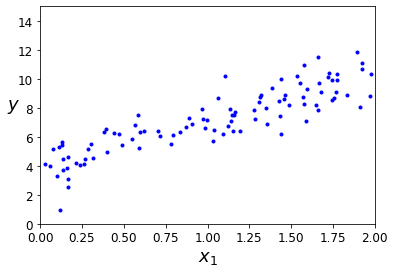

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])


In [4]:
# Add a column with x[0] = 1 for a rows
X_b = np.c_[np.ones((100, 1)), X]
# These's close-form solution of the given problem
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.89053611]
 [3.21724034]]


In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 3.89053611]
 [10.3250168 ]]


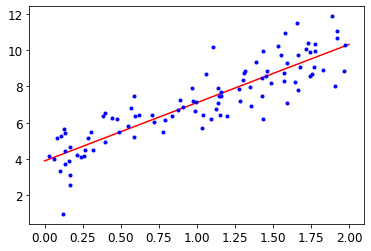

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[3.89053611]
[[3.21724034]]


# Batch Gradient Descent

In [8]:
eta = 0.1  # Learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)


[[3.89053611]
 [3.21724034]]


# Stochastic Gradient Descent

In [9]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(17)

n_epochs = 50
t0, t1 = 5, 50


def learning_schedule(t):
    # Continue to make the eta smaller
    return t0 / (t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

print(theta)


[[3.90240275]
 [3.16455188]]


In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=17)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[3.91459713]
[3.2848763]


# Mini-Batch Gradient Descent

In [11]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(17)
theta = np.random.randn(2, 1)

t0, t1 = 200, 1000


def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
	shuffled_indices = np.random.permutation(m)
	X_b_shuffled = X_b[shuffled_indices]
	y_shuffled = y[shuffled_indices]
	for i in range(0, m, minibatch_size):
		t += 1
		xi = X_b_shuffled[i:i+minibatch_size]
		yi = y_shuffled[i:i+minibatch_size]
		gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
		eta = learning_schedule(t)
		theta = theta - eta * gradients
		theta_path_mgd.append(theta)

print(theta)

[[3.8168444 ]
 [3.11572786]]


## Polynomial Regression

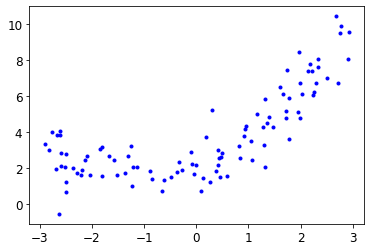

In [12]:
import numpy as np

np.random.seed(17)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")

In [14]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X_poly[0])


[-1.23200998  1.5178486 ]


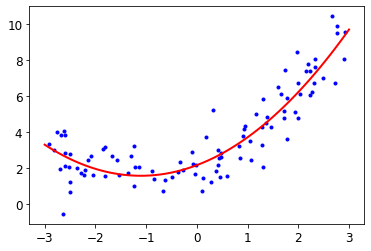

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")


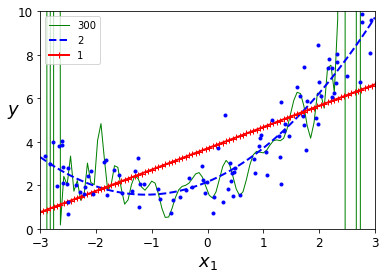

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline(
        [
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ]
    )
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()


## Learning Curves

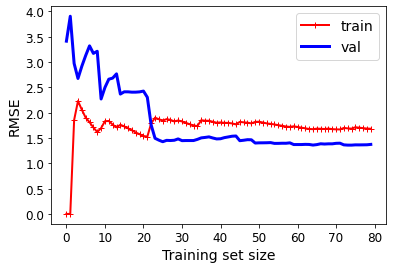

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
	X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
	train_errors, val_errors = [], []
	for m in range(1, len(X_train) + 1):
		model.fit(X_train[:m], y_train[:m])
		y_train_predict = model.predict(X_train[:m])
		y_val_predict = model.predict(X_val)
		train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
		val_errors.append(mean_squared_error(y_val, y_val_predict))
	
	plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
	plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
	plt.legend(loc="upper right", fontsize=14)   # not shown in the book
	plt.xlabel("Training set size", fontsize=14) # not shown
	plt.ylabel("RMSE", fontsize=14)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

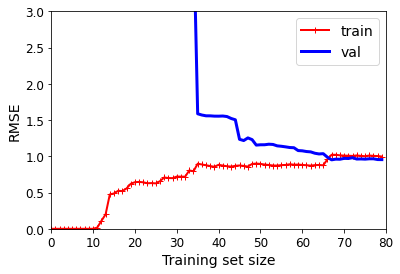

In [30]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ]
)

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

plt.show()


## Regularized Linear Models

### Ridge Regression

In [31]:
np.random.seed(17)

X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [33]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=17)
ridge_reg.fit(X, y)
ret = ridge_reg.predict([[1.5]])
print(ret)

[[1.82208272]]


In [34]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=17)
ridge_reg.fit(X, y)
ret = ridge_reg.predict([[1.5]])
print(ret)

[[1.82209197]]


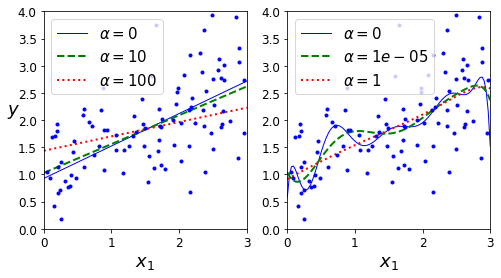

In [40]:
from sklearn.linear_model import Ridge


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
		# When alpha == 0, then it is just the linear regression.
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline(
                [
                    (
                        "poly_features",
                        PolynomialFeatures(degree=10, include_bias=False),
                    ),
					# The data must be preproceesed with scaler
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ]
            )
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(
            X_new,
            y_new_regul,
            style,
            linewidth=lw,
            label=r"$\alpha = {}$".format(alpha),
        )
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])


plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=17)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=17)

plt.show()


/usr/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.228e+01, tolerance: 7.414e-03
  model = cd_fast.enet_coordinate_descent(


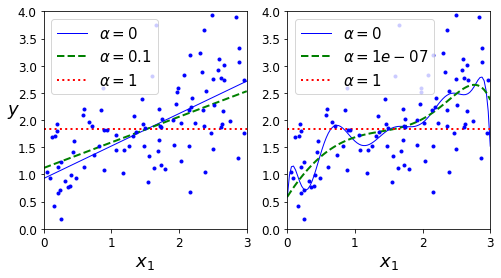

In [42]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8, 4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=17)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=17)

plt.show()


## Early Stopping

Best epoch: 499


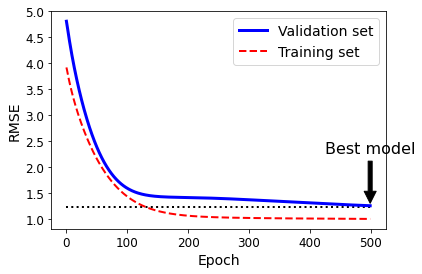

In [48]:
np.random.seed(17)

X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(
    X[:50], y[:50].ravel(), test_size=0.5, random_state=10
)

from copy import deepcopy


poly_scaler = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ]
)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.005,
    random_state=17,
)

mimum_val_error = float("inf")

best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < mimum_val_error:
        mimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.0005,
    random_state=42,
)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

print(f"Best epoch: {best_epoch}")

plt.annotate(
    "Best model",
    xy=(best_epoch, best_val_rmse),
    xytext=(best_epoch, best_val_rmse + 1),
    ha="center",
    arrowprops=dict(facecolor="black", shrink=0.05),
    fontsize=16,
)

best_val_rmse -= 0.03
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()


## Logistic Regression

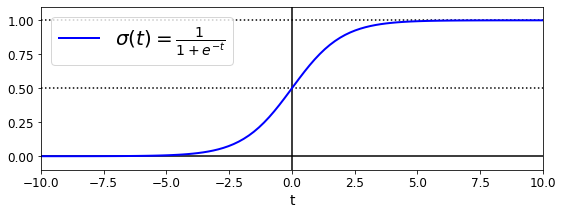

In [51]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="best", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()


In [52]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [53]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [60]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(int) # 1 if Iris is virginica, else 0

In [61]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=17)
log_reg.fit(X, y)

LogisticRegression(random_state=17)

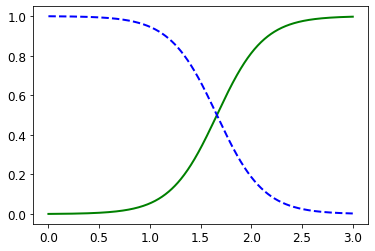

In [64]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.show()

/usr/lib/python3.10/site-packages/matplotlib/patches.py:1444: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.verts = np.dot(coords, M) + [


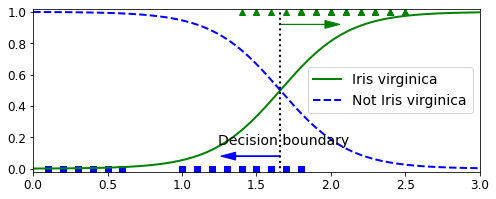

In [74]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]


plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.axis([0, 3, -0.02, 1.02])
plt.legend(fontsize=14)

plt.show()

In [75]:
ret = log_reg.predict([[1.7], [1.5]])
print(ret)

[1 0]


## Softmax

In [91]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", C=10, random_state=17
)
softmax_reg.fit(X, y)  # Train the data

LogisticRegression(C=10, multi_class='multinomial', random_state=17)

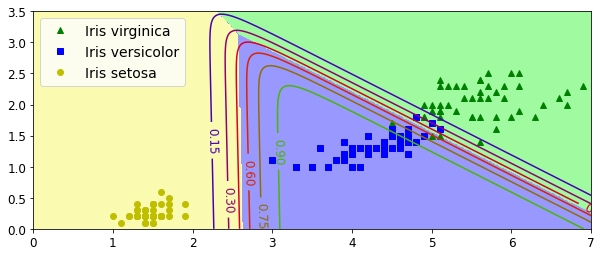

In [100]:
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap

custom_setup = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

plt.contourf(x0, x1, zz, cmap=custom_setup)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.legend(fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


In [103]:
ret = softmax_reg.predict([[5, 2]])
print(ret)

ret = softmax_reg.predict_proba([[5, 2]])
print(ret)

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
